In [52]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import fftpack
from matplotlib.colors import LogNorm
from scipy.misc import imsave

(530, 500, 3)


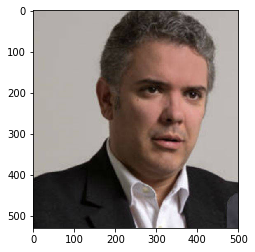

In [49]:
im = cv2.imread('./imgs/duque.jpg')
duque = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(duque.shape)
plt.imshow(duque)
plt.show()

(530, 500, 3)


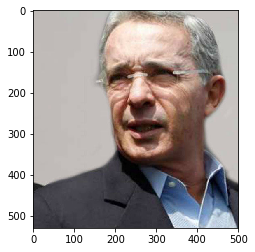

In [50]:
im = cv2.imread('./imgs/uribe.jpg')
uribe = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(uribe.shape)
plt.imshow(uribe)
plt.show()

(900, 800, 3)


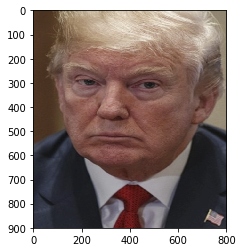

In [10]:
im = cv2.imread('./imgs/Trump.png')
trump = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(trump.shape)
plt.imshow(trump)
plt.show()

(900, 800, 3)


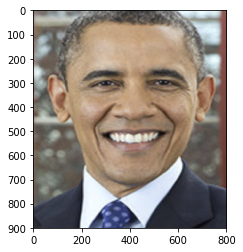

In [11]:
im = cv2.imread('./imgs/Obama.png')
obama = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(obama.shape)
plt.imshow(obama)
plt.show()

In [12]:
def fourier(im):
    res = []
    for i in range(3):
        res.append(fftpack.fft2(im[:,:,i]))
        res[i] = np.fft.fftshift(res[i])
    res = np.dstack((res[0],res[1],res[2]))
    return res
def ifourier(im):
    res = [] 
    for i in range(3):
        res.append(np.fft.fftshift(im[:,:,i]))
        res[i] = fftpack.ifft2(res[i]).real
    res = np.dstack((res[0],res[1],res[2]))
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(int)
    return res
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

In [13]:
def inCircle(x,y,r):
    if((x**2+y**2)**0.5<r):
        return True
    return False

In [14]:
def highFilter(im,r):
    lenx,leny,n = im.shape
    for i in range(lenx):
        for j in range(leny):
            for k in range(n):
                if( inCircle(i-lenx//2,j-leny//2,r)):
                    im[i,j,k]=0+0j
    return im
    
    

In [23]:
def lowFilter(im,r):
    highim = im.copy()
    highim = highFilter(highim,r)
    return im-highim

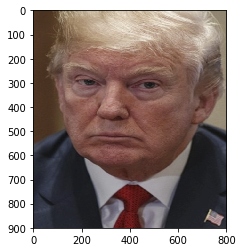

In [24]:
plt.imshow(trump)

In [30]:
def highFrecImage(im,r):
    im = fourier(im)
    im = highFilter(im,r)
    im  = ifourier(im)
    return im
def lowFrecImage(im,r):
    imf = fourier(im)
    lowim = lowFilter(imf,r)
    ifim  = ifourier(lowim)
    return ifim

In [35]:
def makeHybrid(im1,im2,r):
    low = lowFrecImage(im1,r)
    high = highFrecImage(im2,r)
    return low+high

In [31]:
lowTrump = lowFrecImage(trump,5)
highObama = highFrecImage(obama,5)

/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


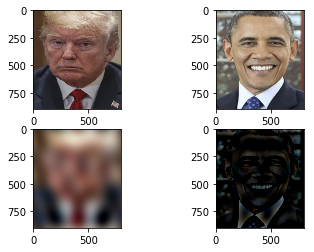

In [32]:
plt.subplot(221)
plt.imshow(trump)
plt.subplot(222)
plt.imshow(obama)
plt.subplot(223)
plt.imshow(lowTrump)
plt.subplot(224)
plt.imshow(highObama)

In [33]:
hybrid = trump+obama

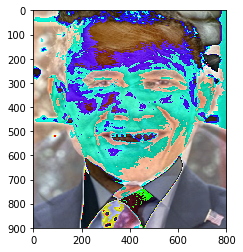

In [34]:
plt.imshow(hybrid)

0 1


/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


1 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


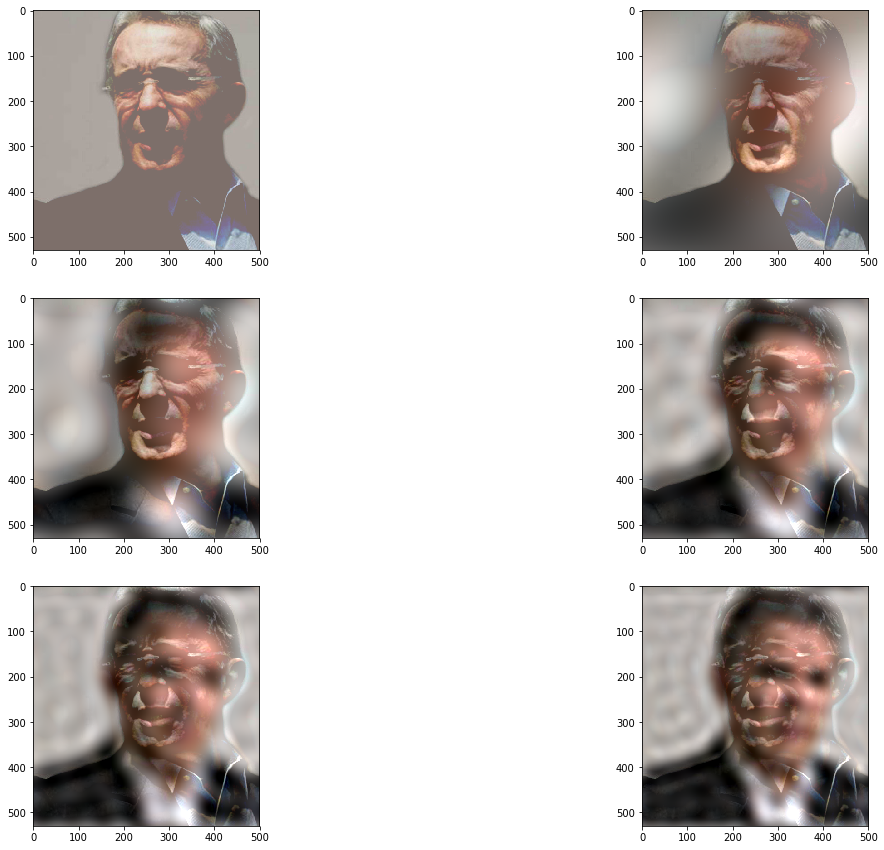

In [51]:
fig = plt.figure(figsize = (20,15))
for i,j in enumerate([1,2,4,6,8,10]):
    print(i,j)
    plt.subplot(3,2,i+1)
    plt.imshow(makeHybrid(duque,uribe,j))

/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


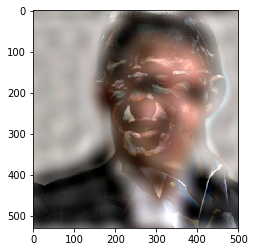

In [53]:
plt.imshow(makeHybrid(duque,uribe,8))

In [56]:
imsave('./imgs/hybrid.png',makeHybrid(duque,uribe,8))

/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
